# UniReps & NeuroAI Hackathon: <br> Aligning Neural Representations

### How do we compare computational models with the brain?
- Understanding how the brain works often requires comparing **different models** with **experimental data**.  
- These comparisons can be made at multiple levels:
  - **Behavioral** patterns  
  - **Neural activity**  
- To make such comparisons, we need a way to relate the **abstract numbers from models** to **experimental observations**.  
- The **goal of this hackathon** is to explore the considerations required for making these comparisons correctly, such that we can get insights into the **inner workings of the brain** through modeling  

### How do researchers compare models with the brain?

| **Method** | **What It Tests** | **How It’s Done** | **Key References** |
|------------|-------------------|-------------------|--------------------|
| **Tuning Curve Comparisons** | Similarity of single-neuron selectivity | Fit and compare tuning functions (e.g., orientation, direction) | [Hubel & Wiesel (1962)](https://pubmed.ncbi.nlm.nih.gov/14449617/) ; [Carandini et al. (2005)](https://www.jneurosci.org/content/25/46/10577) |
| **Encoding Models** | Predictive power of model features for neural activity | Regression from model features → neural responses | [Naselaris et al. (2011)](https://pubmed.ncbi.nlm.nih.gov/20691790/) ; [Yamins et al. (2014)](https://www.pnas.org/doi/10.1073/pnas.1403112111) ; [BrainScore (2018)](https://www.biorxiv.org/content/10.1101/407007v1) |
| **Decoding / Behavioral Alignment** | Similar readout performance from population activity | Classify/decipher stimuli or task variables from activity | [Hung et al. (2005)](https://pubmed.ncbi.nlm.nih.gov/16272124/) ; [Cichy et al. (2016)](https://www.nature.com/articles/srep27755) |
| **Representational Similarity Analysis (RSA)** | Geometry of stimulus representations | Compare representational dissimilarity matrices (RDMs) | [Kriegeskorte et al. (2008)](https://www.frontiersin.org/articles/10.3389/neuro.06.004.2008/full) ; [Khaligh-Razavi & Kriegeskorte (2014)](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003915) |
| **Dimensionality & Population Structure** | Low-dimensional manifold structure | PCA, factor analysis, demixed PCA, manifold alignment | [Churchland et al. (2012)](https://www.nature.com/articles/nature11129) ; [Stringer et al. (2019)](https://www.nature.com/articles/s41586-019-1346-5) ; [Pandarinath et al. (2018)](https://www.jneurosci.org/content/38/44/9390.abstract) |
| **Dynamics Matching** | Temporal evolution & computational motifs | Dynamical systems analysis, fixed points, attractors | [Sussillo & Barak (2013)](https://pubmed.ncbi.nlm.nih.gov/23272922/) ; [Mante et al. (2013)](https://www.nature.com/articles/nature12742) |
| **Information-Theoretic Comparisons** | Coding efficiency & information content | Mutual information, Fisher information, entropy | [Quiroga & Panzeri (2009)](https://www.nature.com/articles/nrn2578) ; [Borst & Theunissen (1999)](https://www.nature.com/articles/nn1199_947) |
| **Task-Performance Equivalence** | Same behavior under same task | Compare psychometric functions, error distributions | [Yamins & DiCarlo (2016)](https://www.nature.com/articles/nn.4244) ; [Richards et al. (2019)](https://www.nature.com/articles/s41593-019-0520-2) |
| **Causal Interventions / Perturbations** | Functional role of units | Virtual lesions, noise injection, compare to optogenetics | [Sajid et al. (2021)](https://pmc.ncbi.nlm.nih.gov/articles/PMC8018968/?utm_source=chatgpt.com) ; [Alstott et al. (2009)](https://pubmed.ncbi.nlm.nih.gov/19521503/) |



### In this hackathon we will explore the Procrustes Alignment to compare the model with neural recordings

* **Procrustes alignment** is a method for comparing the **geometry of population activity** between a model and a set of real neural recordings. It helps us determine if a model's representation of neural activity is similar to what's observed in the brain.
* To illustrate its utility, we'll use Procrustes alignment to compare grid cell activity from an experiment with the neural representations from two different models.
* The necessary tools for this demonstration are available in the **NeuralPlayground** package. However, you are encouraged to write your own implementations as you go.
* We welcome any feedback on how we can improve the **NeuralPlayground** package!


# Hackathon Content

1. **Installing NeuralPlayground**: We will start by setting up the necessary environment and installing the `NeuralPlayground` package.
2. **Accessing Experimental Data**: We'll get access to experimental data from the Sargolini et al. (2006) study, which contains recorded grid cell activity.
3. **Loading Pre-trained Models**: You will be able to load pre-trained models (or you can train it yourself!) to get a theoretical representation of grid cell activity. One model corresponding to the Successor Representation (SR from [Stachenfeld et al. 2017](https://www.nature.com/articles/nn.4650)), and an excitatory and inhibitory plasticity model (EI from [Weber & Sprekeler 2018](https://elifesciences.org/articles/34560))
4. **Comparing Model and Experimental Data**: The final step is to use Procrustes alignment to compare the model's neural activity with the experimental grid cell data.

## 1. Setting up the NeuralPlayground Environment

- This installation requires **Python**, **pip** and **git**.  
- For a lightweight setup, we recommend using **Miniconda**.  
- If you don’t have Miniconda installed, follow the instructions below.  
- If you already have Miniconda, simply activate your environment and run:  

```bash
git clone https://github.com/SainsburyWellcomeCentre/NeuralPlayground
cd NeuralPlayground
pip install -e .[dev]
```
pip will install all the necessary requirements to run the Jupyter notebook, including: scipy, matplotlib, torch (We do have an older version that you can install with `pip install neuralplayground`, but the version in the repo is straight from the oven! with new features specifically done for this hackathon)

If you already have an environment with these dependencies installed, you can use that instead.

**After installing NeuralPlayground you can jump to Section 2**

## Install Miniconda and Environment

Miniconda is a minimal installer for Conda, providing a lightweight way to get started with Python and package management.
You can find the [original instructions here](https://www.anaconda.com/docs/getting-started/miniconda/install), or you can folow the ones below.

* **Download the installer:**
    * **macOS:** Open your terminal and use `curl` to download the installer:
        ```bash
        curl -O https://repo.anaconda.com/miniconda/Miniconda3-latest-MacOSX-x86_64.sh
        ```
        <br>
    * **Linux:** Open your terminal and use `wget` (or `curl` if `wget` isn't available) to download the installer:
        ```bash
        wget https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
        ```
        <br>
    * **Windows:** Download the installer directly from the official Miniconda website using your web browser:
        [https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe](https://www.google.com/search?q=https://repo.anaconda.com/miniconda/Miniconda3-latest-Windows-x86_64.exe)

* **Run the installer:**

    * **macOS/Linux:**
        ```bash
        bash Miniconda3-latest-MacOSX-x86_64.sh # For macOS
        # OR
        bash Miniconda3-latest-Linux-x86_64.sh # For Linux
        ```
        <br>
        Follow the prompts: press `ENTER` to accept the license, type `yes` to accept the license terms, and press `ENTER` to confirm the installation location. When asked if you want to initialize Conda, type `yes`.
        <br>
      
    * **Windows:** Double-click the downloaded `.exe` file and follow the on-screen instructions. Choose "Just Me" for installation unless you need it for all users, and accept the default installation location. Ensure you check "Add Miniconda3 to my PATH environment variable" during installation, though it's often recommended to avoid this and use the Anaconda Prompt instead.

* **Restart your terminal/shell:**

    * **macOS/Linux:** Close and reopen your terminal or run `source ~/.bashrc` (Linux) or `source ~/.zshrc` (macOS with Zsh) to apply the changes.

    * **Windows:** Open a new **Anaconda Prompt (Miniconda3)** from your Start Menu. This prompt is specifically configured to use your Conda installation.

### Create a Conda Environment

Creating separate environments helps manage dependencies for different projects and avoids conflicts.

* **Create a new environment:** Replace `myenv` with your desired environment name and `python=3.13` with your preferred Python version.
    ```bash
    conda create -n myenv python=3.13
    ```
    <br>
* **Activate the environment:**

    ```bash
    conda activate myenv
    ```
    <br>
    You'll see the environment name in your terminal or Anaconda Prompt (e.g., `(myenv) your_username@your_machine:~$` or `(myenv) C:\Users\your_username>`).


### Install Pip

`pip` is Python's standard package installer. It allows you to install packages that might not be available through Conda channels.

* **Install pip in your active environment:**

    ```bash
    conda install pip
    ```
    <br>
    Alternatively, `pip` is often included by default when you create an environment with a Python version. You can verify its presence and version by running:

    ```bash
    pip --version
    ```

From here just clone the repo and install as an editor.
```bash
git clone https://github.com/SainsburyWellcomeCentre/NeuralPlayground
cd NeuralPlayground
pip install -e .
```

## 2. Accessing Experimental Data

As mentioned before, in this hackathon we will use **grid cells** as examples.  
**Grid cells** are a type of neuron found in the **medial entorhinal cortex (MEC)** of the brain, first discovered in 2005 by [Hafting et al. (2005)](https://www.nature.com/articles/nature03721). 

These cells are remarkable for their unique firing patterns: as an animal moves through its environment, a grid cell activates at multiple locations that form a **hexagonal grid-like pattern** across space.

This spatially periodic activity makes grid cells essential for **navigation** and **spatial memory**.  
Unlike **place cells**, which fire at specific locations ([O’Keefe & Dostrovsky, 1971](https://www.science.org/doi/10.1126/science.171.3967.208)), grid cells provide a **coordinate system** that can generalize across different environments.

Grid cells have become one of the most studied neural representations due to their:

- **Structured and regular firing patterns** ([Moser et al. 2014](https://www.nature.com/articles/nrn3766))
- **Role in path integration** (estimating position based on self-motion) ([McNaughton et al., 2006](https://www.nature.com/articles/nrn1932))
- **Relevance to models of cognitive mapping and spatial encoding** ([Moser et al., 2008](https://www.annualreviews.org/doi/10.1146/annurev.neuro.31.061307.090723))

Understanding grid cells has been crucial in bridging **neuroscience and computational models**, especially in exploring how the brain constructs internal maps of the external world.


### Conjunctive Representation of Position, Direction, and Velocity in Entorhinal Cortex (Sargolini et al., 2006)

**Experimental Setup**

- **Subjects**: Rats exploring a two-dimensional open environment.
- **Recording Sites**: Principal neuron layers (II, III, V, VI) of medial entorhinal cortex (MEC).
- **Method**:
  - Multi-layer neuronal recordings using tetrodes in dorsal MEC of 17 rats.
  - Rats moved freely in a square arena (two 10-minute sessions with a 10-minute interval between).
  - Neural activity tracked relative to position, head direction, and running speed.
- **Cells Identified**:
  - **Grid cells** (periodic spatial firing) present in **all layers**, particularly dense in layer II.
  - **Head-direction cells** (tuned to facing direction).
  - **Conjunctive cells** that simultaneously code for **position**, **head direction**, and **velocity** in deeper layers.

**Main Conclusions**

- **Layer-specific representations**:
  - Layer II dominated by pure grid cells;
  - Deeper layers feature mixtures—grid, head-direction, and conjunction neurons.
- **Speed modulation**:
  - All identified cell types (grid, head-direction, conjunctive) exhibit firing rate modulation by the animal’s running speed.
- **Conjunctive coding supports self-motion updating**:
  - The integration of spatial location, head direction, and velocity within single units provides a robust mechanism for **path-integration**, enabling the navigation system to update spatial coordinates continuously during movement.

### Let's look at some grid cells from Sargolini et al. 2006

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

from neuralplayground.experiments import Sargolini2006Data

- Set `verbose=True` for more detailed information.  
- By default, `fetch_subset=True` downloads only a subset of the dataset.  
- If you set `fetch_subset=False`, the **entire dataset** (≈2.38 GB) will be downloaded.  
- In this notebook, we will use only a few neurons, but if you want to explore the full dataset, set `fetch_subset=False`.  

In [2]:
sargolini_data = Sargolini2006Data(verbose=False, fetch_subset=True)

In [3]:
dataframe = sargolini_data.show_data(full_dataframe=True)

Dataframe with recordings


,rat_id,session,recorded_vars
rec_index,,,
0,11016,02020502,"[T5C1, T7C1, EEG, EGF, position]"
1,11016,25010501,"[T6C2, EEG, EGF, position]"
2,11016,28010501,"[T1C2, EEG, EGF, position]"
3,11016,29010503,"[T5C1, T6C1, T6C2, T7C1, EEG, EGF, position]"
4,11016,31010502,"[T5C2, T6C1, T6C2, T6C3, T8C2, EEG, EGF, posit..."


In [4]:
sargolini_data = Sargolini2006Data(verbose=False)
help(sargolini_data.plot_spike_train)

Help on method plot_spike_train in module neuralplayground.experiments.hafting_2008_data:

plot_spike_train(recording_index: Union[int, tuple, list] = None, save_path: Union[str, tuple, list] = None, ax: Union[matplotlib.axes._axes.Axes, tuple, list] = None, tetrode_id: Union[str, tuple, list] = None, smoothness: float = 0.1) method of neuralplayground.experiments.sargolini_2006_data.Sargolini2006Data instance
    Plot tetrode spike train from spike data for a given recording index or a list of recording index.
    If given a list or tuple as argument, all arguments must be list, tuple, or None.

    Parameters
    ----------
    recording_index: int, tuple of ints, list of ints
        recording index to plot spike ratemap, if list or tuple, it will recursively call this function
        to make a plot per recording index. If this argument is list or tuple, the rest of variables must
        be list or tuple with their respective types, or keep the default None value.
    save_path: s

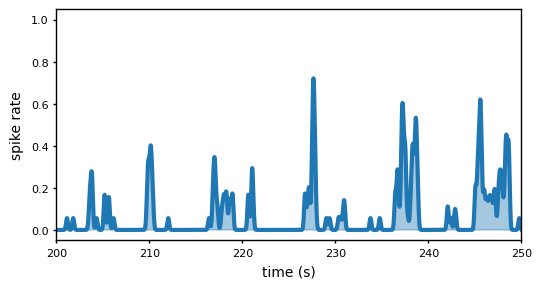

In [5]:
f, ax = plt.subplots(1, 1, figsize=(6, 3))
# This returns positions x, y, time in seconds and spike times
x, y, time_array, spikes = sargolini_data.plot_spike_train(recording_index=4, tetrode_id="T5C2", ax=ax)
ax.set_xlim([200, 250])
plt.show()

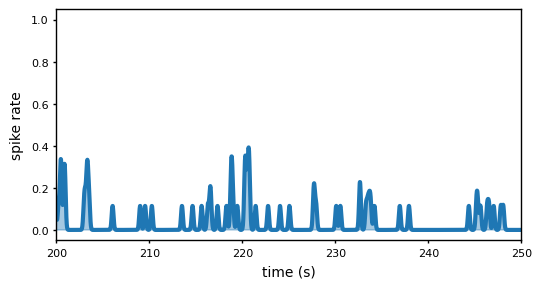

In [6]:
f, ax = plt.subplots(1, 1, figsize=(6, 3))
# This returns positions x, y, time in seconds and spike times
x, y, time_array, spikes = sargolini_data.plot_spike_train(recording_index=4, tetrode_id="T8C2", ax=ax)
ax.set_xlim([200, 250])
plt.show()

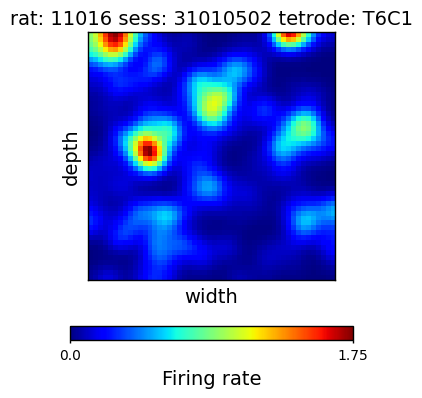

In [7]:
f, ax = plt.subplots(1, 1, figsize=(4, 4))
# Average firing rate for different places in the 2D arena
rate_map, x_bin, y_bin = sargolini_data.plot_recording_tetr(ax=ax, recording_index=4, tetrode_id="T6C1")
plt.show()

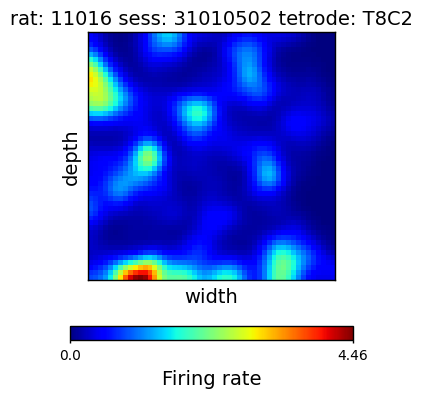

In [8]:
f, ax = plt.subplots(1, 1, figsize=(4, 4))
# Average firing rate for different places in the 2D arena
rate_map, x_bin, y_bin = sargolini_data.plot_recording_tetr(ax=ax, recording_index=4, tetrode_id="T8C2")
plt.show()

### Now you have access to all neurons in the dataset!

We encourage you to examine the different types of cells observed. 
- Are they all strongly grid-like? How many distinct types appear?
- How should we classify the others? Are the patterns consistent across animals?

If you want to explore additional datasets and features of the `Experiment` class,  
please check out [our notebook with more examples](https://github.com/SainsburyWellcomeCentre/NeuralPlayground/blob/main/examples/experimental_examples/experimental_data_examples.ipynb).


### Creating an environment to train each model

- Before training the models used in this hackathon, we will first create an environment.  

- This package allows you to:  
  - Import **pre-made environments** with the correct dimensions, similar to the experiment.  
  - Automatically load the **behavioral data**, giving access to the animal’s behavior, which can later be used to train the agent. For that you can set `use_behavioral_data=True`  
  - Use the **default policy** of each agent, which imitates naturalistic behavior, `use_behavioral_data=False`

This environment is quite simple and serves the purpose of the hackathon, but you could try training agents in more complicated environments, or even make your own! Please check our [jupyter notebook](https://github.com/SainsburyWellcomeCentre/NeuralPlayground/blob/main/examples/arena_examples/arena_examples.ipynb) with examples on how to built custom environments.

You can experiment with different types of arenas. They are typically designed to resemble those used when recording grid cells, but feel free to try variations and compare the outcomes.

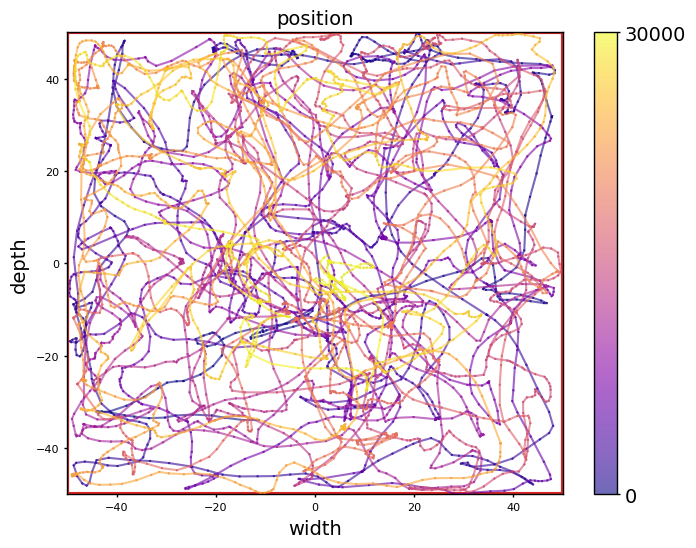

In [9]:
from neuralplayground.arenas import Sargolini2006

env_name = "Sargolini2006"
time_step_size = 0.1 #seg
agent_step_size = 5

env = Sargolini2006(environment_name = env_name,
                    time_step_size = time_step_size,
                    agent_step_size = agent_step_size,
                    use_behavioral_data = True)

env.plot_recorded_trajectory(recording_index=3, plot_every=5)

# We can set this trajectory to be used by the agent by setting 
env.set_animal_data(recording_index=3)

## 3. Training agents

- We now move on to training the agents.  

- Our goal is to compare the **grid-cell representations** of two models against experimental data:  
  - **Successor Representation (SR) model** from [Stachenfeld et al., 2017](https://www.nature.com/articles/nn.4650).  
  - **Excitatory/Inhibitory Plasticity model** from [Weber & Sprekeler, 2018](https://elifesciences.org/articles/34560).  

- Both models provide theoretical mechanisms for the emergence of grid cells:  
  - The SR model explains grid cells as eigenvectors of the successor representation matrix.  
  - The plasticity model explains them as the result of the balance between excitatory and inhibitory plasticity.  

- We will train these models using **animal trajectory data** and then compare the **emergent grid-cell representations** to neural recordings.  


## Summary of the Successor Representation (SR), [Stachenfeld et al. 2017](https://www.nature.com/articles/nn.4650)

- **Successor Representation (SR):**  
  Consider an environment modeled as a Markov chain with transition matrix $T$ under some policy $\pi$.  
  The SR is defined as the expected discounted future occupancy of states:  

  $$
  M(s, s') = \mathbb{E}\left[\sum_{t=0}^\infty \gamma^t \, \mathbb{I}\{s_t = s'\} \mid s_0 = s\right]
  $$

- **Derivation of Matrix Form:**  
  Expanding the expectation over transitions:  

  $$
  M = I + \gamma T + \gamma^2 T^2 + \gamma^3 T^3 + \cdots
  $$

  This is a geometric series in matrices, which converges when $\gamma < 1$:  

  $$
  M = (I - \gamma T)^{-1}
  $$

- **Decomposing Value Function:**  
  Given a reward vector $R$, the value of state $s$ is:  

  $$
  V(s) = \sum_{s'} M(s, s') \, R(s')
  $$

  or in vector form:  

  $$
  V = M R
  $$

- **Eigen-decomposition and Grid Cells:**  
  The SR can be decomposed as:  

  $$
  M = \Phi \Lambda \Phi^{-1}
  $$

  where the eigenvectors in $\Phi$ form spatial basis functions. Many of these exhibit periodic, wave-like structure resembling grid cell firing fields.

- **Interpretation of Eigenvectors:**  
  - **Low-frequency eigenvectors**: capture broad spatial structure (hierarchical planning, subgoals).  
  - **High-frequency eigenvectors**: produce fine, periodic patterns akin to entorhinal grid cells.
    <br>
    
- **Functional Significance:**  
  Grid cells are thus modeled as the **eigenvectors of the SR**, providing a low-dimensional basis for efficient representation, planning, and noise robustness.

In [10]:
from neuralplayground.agents import Stachenfeld2018

agent_step_size = 5
discount = .9
threshold = 1e-6
lr_td = 1e-1
t_episode = 1000
n_episode = 100
state_density = (1 / agent_step_size)
twoDvalue = True

SR_agent = Stachenfeld2018(discount=discount, t_episode=t_episode, n_episode=n_episode, threshold=threshold, lr_td=lr_td,
                           room_width=env.room_width, room_depth=env.room_depth, state_density=state_density, twoD=twoDvalue)

You can read the implementation of each of this agent in
https://github.com/SainsburyWellcomeCentre/NeuralPlayground/blob/main/neuralplayground/agents/stachenfeld_2018.py

Additive updates method


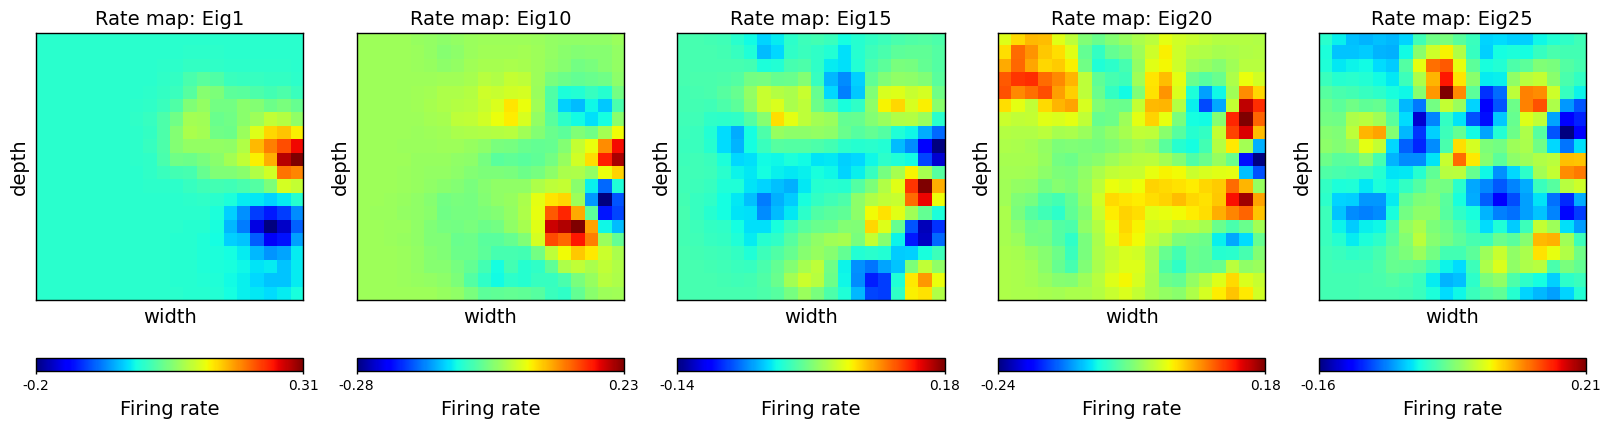

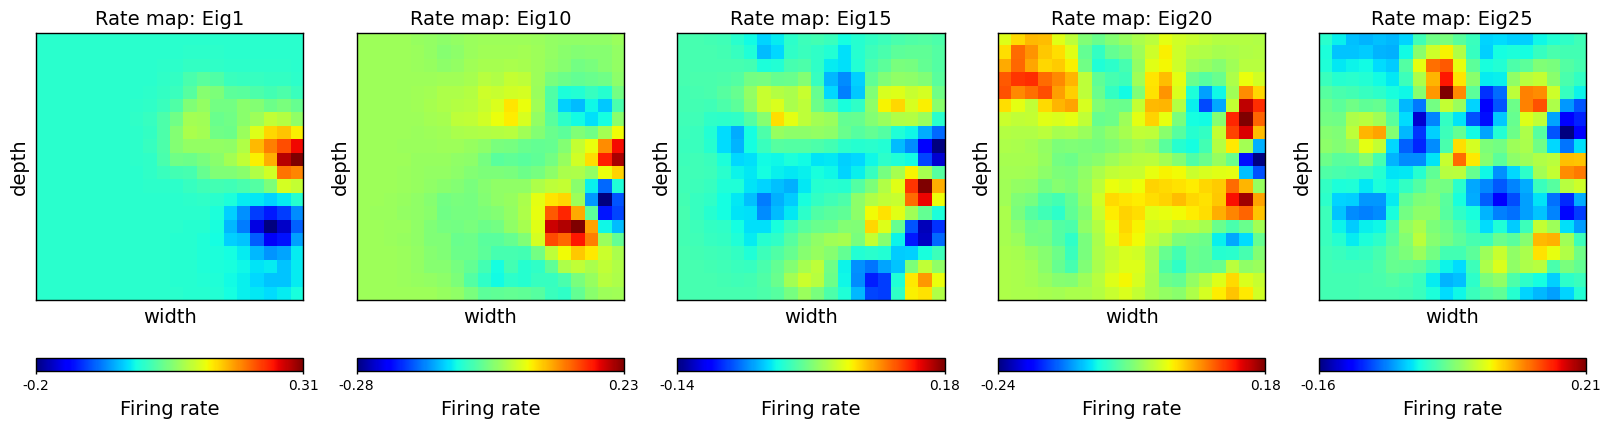

In [11]:
# One can compute the successor representation using successive additive update
print("Additive updates method")
sr = SR_agent.update_successor_rep_td_full(n_episode=100, t_episode=100) 
SR_agent.plot_rate_map(SR_agent.srmat_full_td, eigen_vectors=[1,10,15,20,25])
SR_agent.plot_rate_map(sr, eigen_vectors=[1,10,15,20,25])

Geometric Sum method


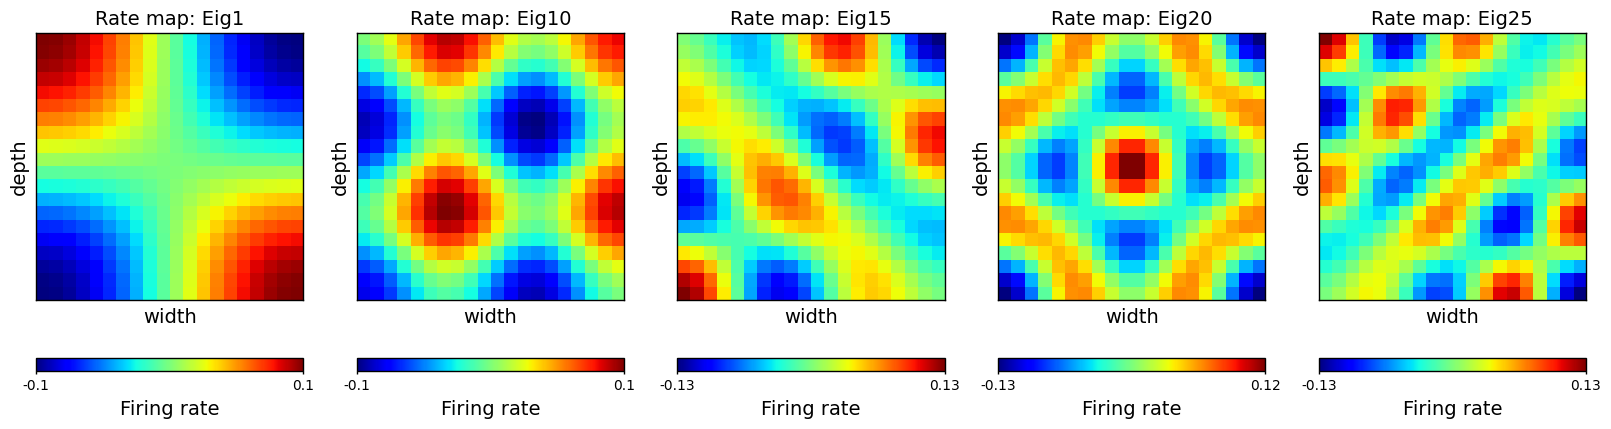

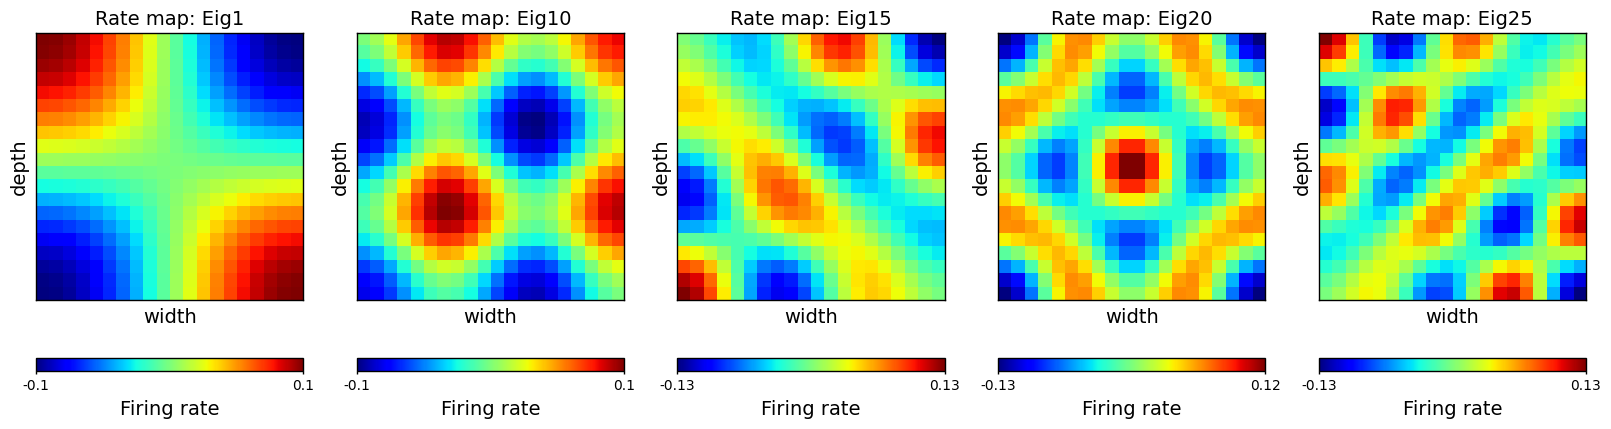

In [12]:
# One can compute the successor representation matrix using geometric sums for $\gamma<1$
print("Geometric Sum method")
sr_sum = SR_agent.successor_rep_sum() 
SR_agent.plot_rate_map(SR_agent.srmat_sum, eigen_vectors=[1,10,15,20,25])
SR_agent.plot_rate_map(sr_sum, eigen_vectors=[1,10,15,20,25])

Closed form solution of the successor representation


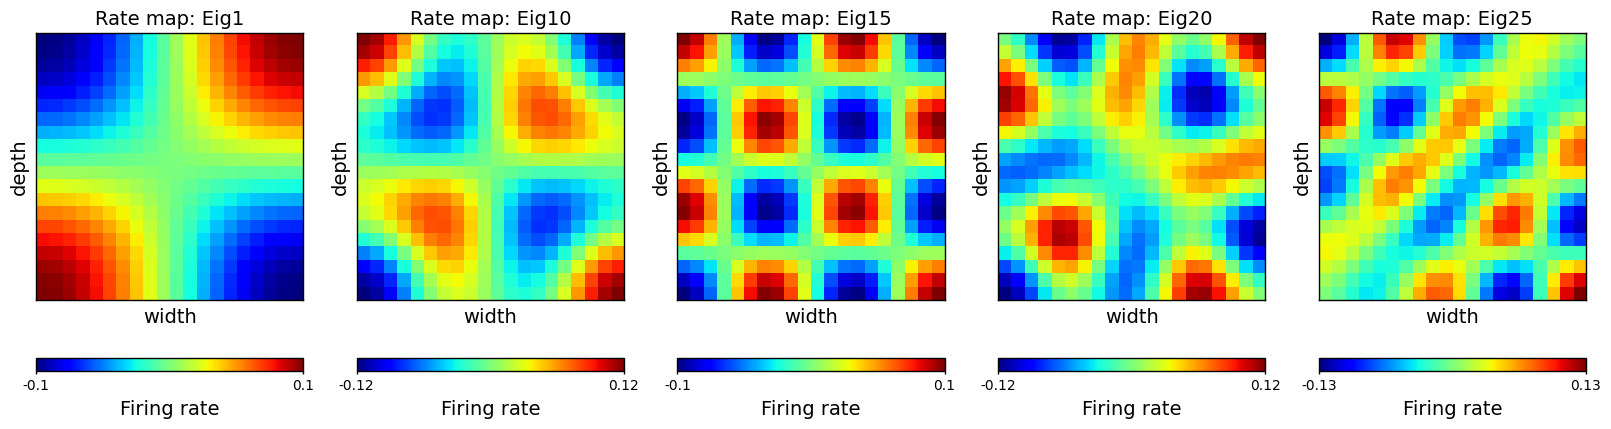

In [13]:
print("Closed form solution of the successor representation")
srmat_ground = SR_agent.successor_rep_solution()
SR_agent.plot_rate_map(SR_agent.srmat_ground, eigen_vectors=[1,10,15,20,25])

Note that in all of the above, the method used to compute $M$ does not rely on the environment. Instead, it assumes a 2D space where all transitions between nearby places are possible. This assumption may not always hold, and in such cases, we need to train the agent in an environment as follows.

You could also train this agent in other environments, as in https://github.com/SainsburyWellcomeCentre/NeuralPlayground/blob/main/examples/arena_examples/arena_examples.ipynb 

100%|██████████████████████████████| 1000000/1000000 [00:30<00:00, 32663.33it/s]


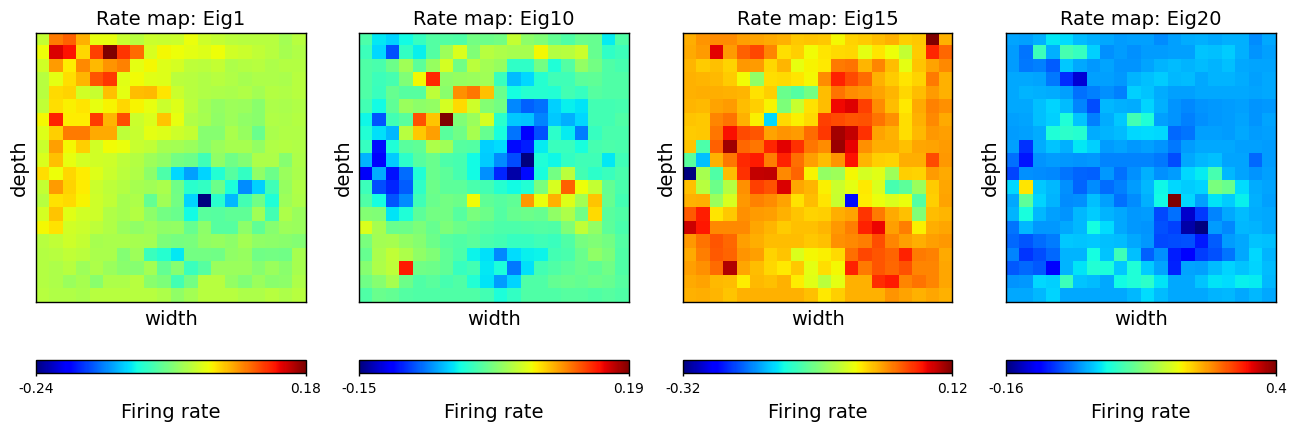

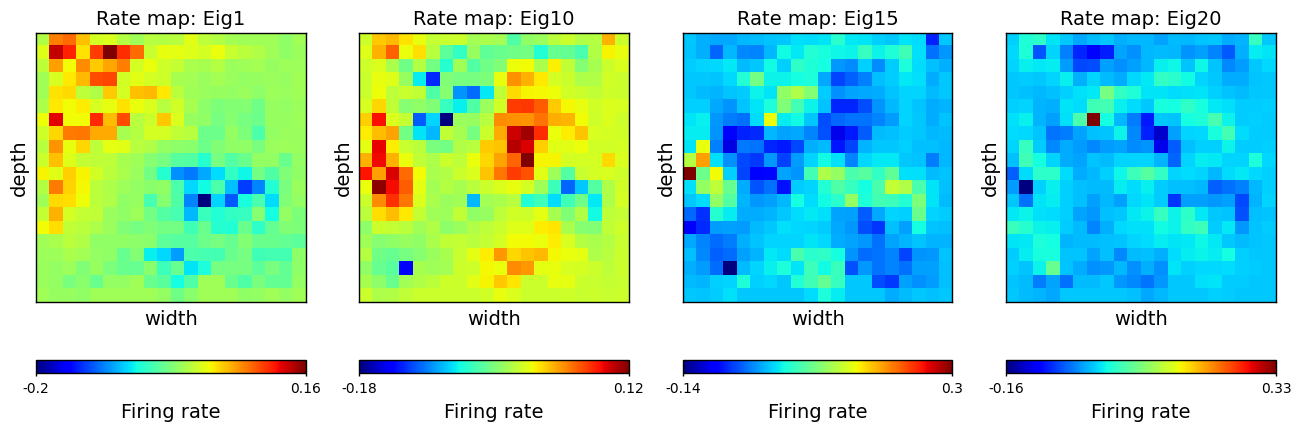

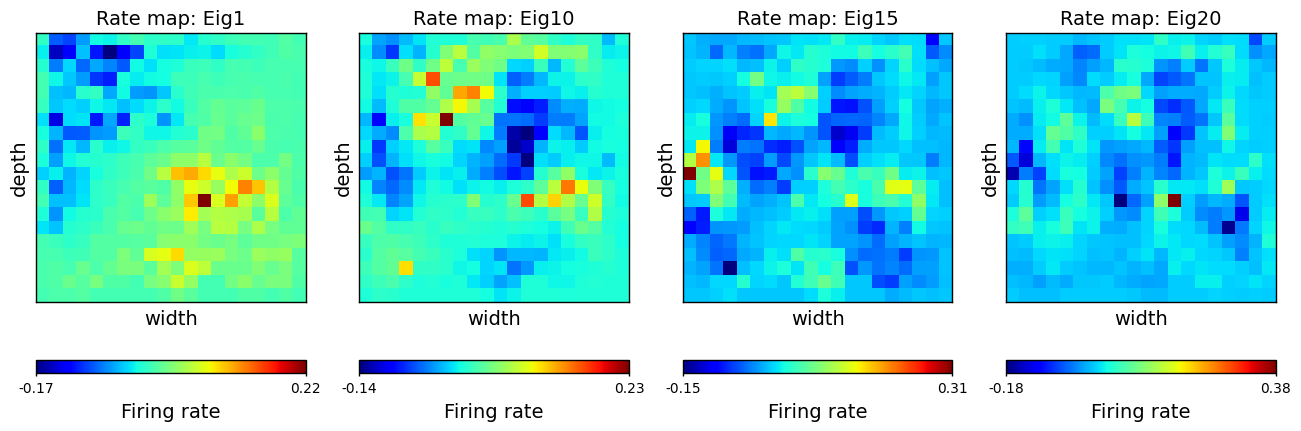

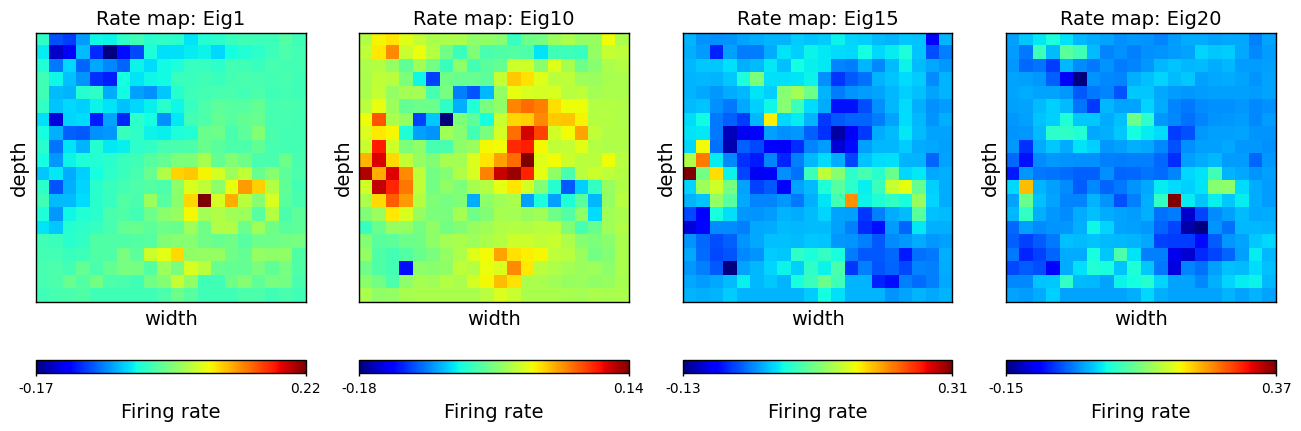

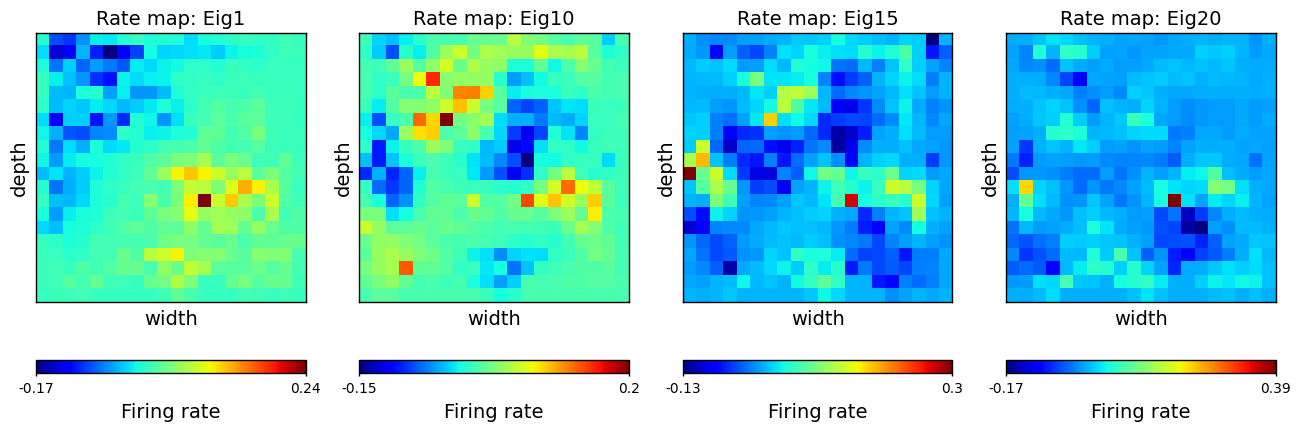

In [14]:
plot_every = 200000
total_iters = 0
obs, state = env.reset()
for i in tqdm(range(1000000)):
# Observe to choose an action
    action = SR_agent.act(obs[:2])  # the action is link to density of state to make sure we always land in a new
    SR_agent.update()
    obs, state, reward = env.step(action)
    obs= obs[:2]
    total_iters += 1
    if total_iters % plot_every == 0:
        SR_agent.plot_rate_map(sr_matrix=SR_agent.srmat, eigen_vectors=[1,10,15,20])

## Summary of place cells and grid cells with excitatory and inhibitory plasticity

[Weber & Sprekeler 2018](https://elifesciences.org/articles/34560)

In this work, the authors propose a theoretical model in which **place cells and grid cells** emerge from the interaction of excitatory and inhibitory plasticity. The spatial structure of the output cells depends critically on the relative smoothness of the excitatory and inhibitory tuning functions, $r_i^{E}(x)$ and $r_j^{I}(x)$, where $x$ denotes the animal’s position.


## Output activity

The activity of the output neuron is given by

$$
r^{out}(x(t)) = \Bigg[ \sum_{i=1}^{N_{e}} w_i^{E}(t) \, r_i^{E}(x(t)) \;-\; \sum_{j=1}^{N_{i}} w_j^{I}(t) \, r_j^{I}(x(t)) \Bigg]_{+},
$$

where $N_e$ and $N_i$ are the numbers of excitatory and inhibitory inputs, $w_i^E$ and $w_j^I$ are their synaptic weights, and $[\,\cdot\,]_{+}$ denotes rectification (ReLU nonlinearity).  

For example, a typical input tuning curve can be modeled as a Gaussian:

$$
r_i^P(x) = \alpha_P \exp\!\left(-\frac{(x - \mu_i)^2}{2\sigma_P^2}\right),
$$

with random centers $\mu_i$ and width $\sigma_P$, where $P \in \{E, I\}$.


## Synaptic plasticity rules

Weights evolve according to local Hebbian-like rules:

- **Excitatory synapses:**

$$
\Delta w^{E} = \eta_E \, r^{E}(x) \, r^{out}(x),
$$

which strengthens excitatory weights whenever presynaptic input $r^E(x)$ and output activity $r^{out}(x)$ are co-active.

- **Inhibitory synapses:**

$$
\Delta w^{I} = \eta_I \, r^{I}(x) \, \big(r^{out}(x) - \rho_0\big),
$$

which adjusts inhibition depending on the deviation of the output from a homeostatic target firing rate $\rho_0$.

## Mechanism for grid-cell emergence

The **relative smoothness** of excitatory vs. inhibitory tuning functions determines the emergent spatial patterns:

- All excitatory and inhibitory rate cell ratemaps are simple Gaussians
- If inhibitory inputs are **broader** (smoother) than excitatory ones, the output neuron develops **periodic grid-like firing fields**.  
- If inhibitory inputs are **narrower**, localized **place-cell–like firing** emerges.  
- Balanced smoothness can also generate band-like cells and other spatial invariances.


## Implementation

In simulations, the position $x(t)$ can be sampled either from a random walk in 1D/2D space or from recorded animal trajectories. Using the above equations, the network self-organizes to produce **place cells, grid cells, or band cells**, depending only on the statistics of the excitatory and inhibitory inputs and their relative smoothness.

See the implementation in https://github.com/SainsburyWellcomeCentre/NeuralPlayground/blob/main/neuralplayground/agents/weber_2018.py

In [15]:
from neuralplayground.agents import Weber2018

# Parameters to reproduce Figure 2a in the paper
# 
exc_eta = 2e-4
inh_eta = 8e-4
model_name = "model_example"
sigma_exc = np.array([0.05, 0.05])
sigma_inh = np.array([0.1, 0.1])
Ne = 4900
Ni = 1225
Nef = 1
Nif = 1
alpha_i = 1
alpha_e = 1
we_init = 1.0
wi_init = 1.5
agent_step_size = 0.1
roh = 1
W_agent = Weber2018(model_name=model_name, exc_eta=exc_eta, inh_eta=inh_eta, sigma_exc=sigma_exc,
                    sigma_inh=sigma_inh, Ne=Ne, Ni=Ni, agent_step_size=agent_step_size, ro=roh,
                    Nef=Nef, Nif=Nif, room_width=env.room_width, room_depth=env.room_depth,
                    alpha_i=alpha_i, alpha_e=alpha_e, we_init=we_init, wi_init=wi_init)

  0%|                                                  | 0/1225 [00:00<?, ?it/s]/Users/rodrigo/miniconda3/envs/npg/lib/python3.12/site-packages/scipy/stats/_covariance.py:630: RuntimeWarning: divide by zero encountered in matmul
  return x @ self._LP
/Users/rodrigo/miniconda3/envs/npg/lib/python3.12/site-packages/scipy/stats/_covariance.py:630: RuntimeWarning: overflow encountered in matmul
  return x @ self._LP
/Users/rodrigo/miniconda3/envs/npg/lib/python3.12/site-packages/scipy/stats/_covariance.py:630: RuntimeWarning: invalid value encountered in matmul
  return x @ self._LP
100%|█████████████████████████████████████| 4900/4900 [00:01<00:00, 4329.97it/s]


/Users/rodrigo/Projects/NeuralPlayground/neuralplayground/agents/weber_2018.py:317: RuntimeWarning: divide by zero encountered in matmul
  r_out = self.we.T @ self.exc_cell_list - self.wi.T @ self.inh_cell_list
/Users/rodrigo/Projects/NeuralPlayground/neuralplayground/agents/weber_2018.py:317: RuntimeWarning: overflow encountered in matmul
  r_out = self.we.T @ self.exc_cell_list - self.wi.T @ self.inh_cell_list
/Users/rodrigo/Projects/NeuralPlayground/neuralplayground/agents/weber_2018.py:317: RuntimeWarning: invalid value encountered in matmul
  r_out = self.we.T @ self.exc_cell_list - self.wi.T @ self.inh_cell_list


array([<Axes: title={'center': 'Exc rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Inh rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
      dtype=object)

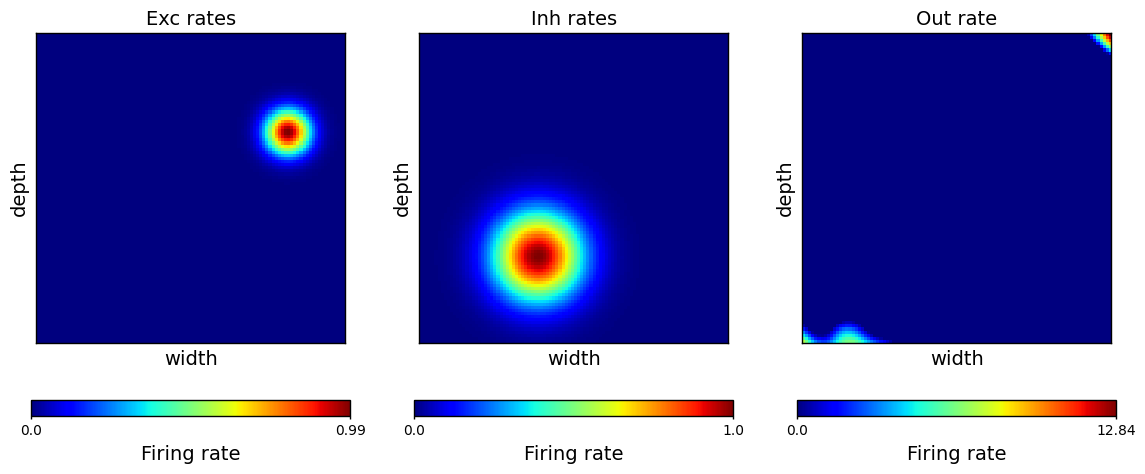

In [16]:
# Rate maps of excitatory, inhibitory and output neuron r_out
W_agent.plot_all_rates()

  0%|                                                | 0/300000 [00:00<?, ?it/s]/Users/rodrigo/Projects/NeuralPlayground/neuralplayground/agents/weber_2018.py:276: RuntimeWarning: divide by zero encountered in matmul
  r_out = self.we.T @ exc_rates - self.wi.T @ inh_rates
/Users/rodrigo/Projects/NeuralPlayground/neuralplayground/agents/weber_2018.py:276: RuntimeWarning: overflow encountered in matmul
  r_out = self.we.T @ exc_rates - self.wi.T @ inh_rates
/Users/rodrigo/Projects/NeuralPlayground/neuralplayground/agents/weber_2018.py:276: RuntimeWarning: invalid value encountered in matmul
  r_out = self.we.T @ exc_rates - self.wi.T @ inh_rates
/Users/rodrigo/Projects/NeuralPlayground/neuralplayground/agents/weber_2018.py:317: RuntimeWarning: divide by zero encountered in matmul
  r_out = self.we.T @ self.exc_cell_list - self.wi.T @ self.inh_cell_list
/Users/rodrigo/Projects/NeuralPlayground/neuralplayground/agents/weber_2018.py:317: RuntimeWarning: overflow encountered in matmul
  r_ou

array([<Axes: title={'center': 'Exc rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Inh rates'}, xlabel='width', ylabel='depth'>,
       <Axes: title={'center': 'Out rate'}, xlabel='width', ylabel='depth'>],
      dtype=object)

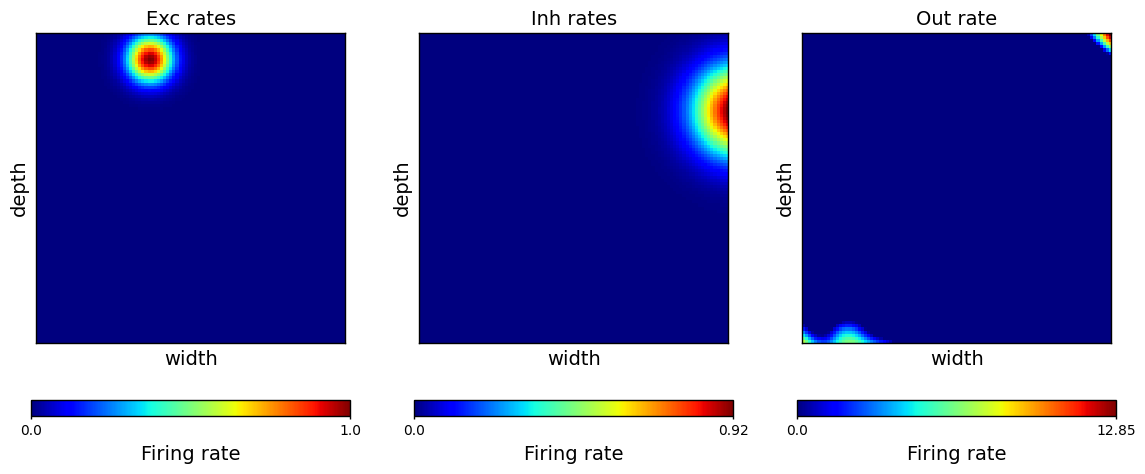

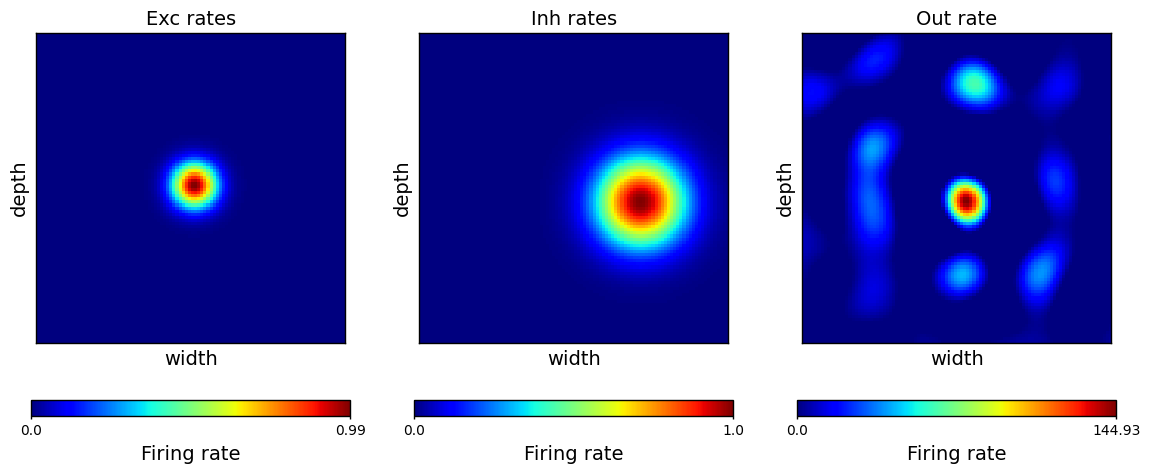

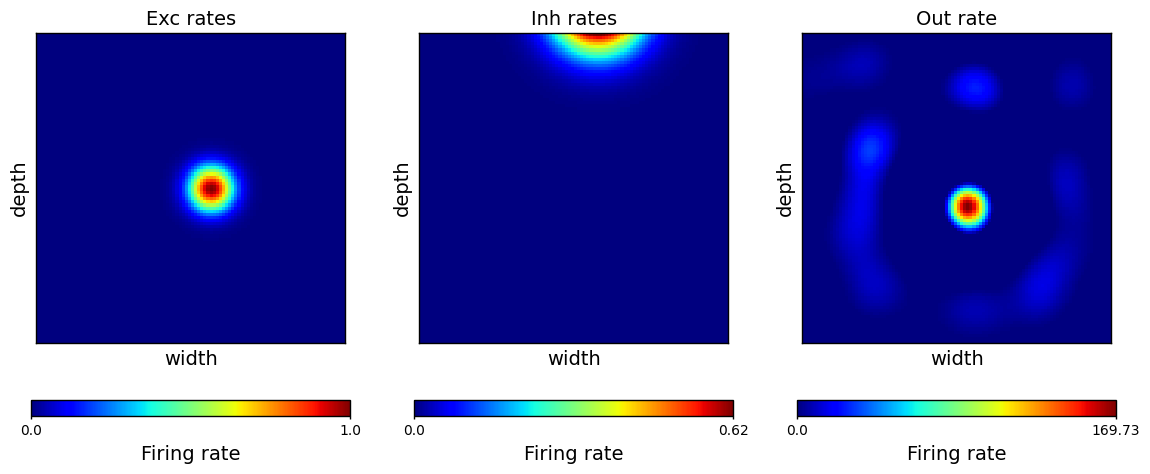

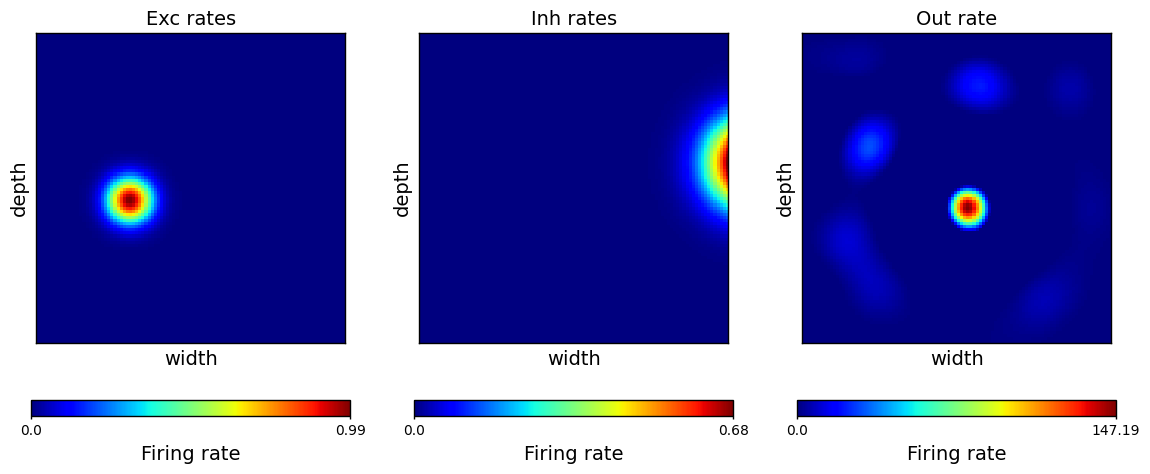

In [17]:
""" You might want to go and grab a coffee while this runs :)
    You can also used the pre-computed responses
"""
plot_every = 100000
total_iters = 0
n_steps = 300000
obs, state = env.reset()
for i in tqdm(range(n_steps)):
    # Observe to choose an action, the first to numbers in the observation 
    # are the xy position of the agent
    obs = obs[:2]
    action = W_agent.act(obs)
    W_agent.update()
    # Run environment for given action
    obs, state, reward = env.step(action, normalize_step=True)
    total_iters += 1
    if i % plot_every == 0:
        W_agent.plot_all_rates()

W_agent.plot_all_rates()

### Play with the Models!

Take some time to experiment with the models by adjusting their parameters.  
For example, try changing the size of the environment or other settings, and observe how these changes affect the results.  

- What differences do you notice between the two agents?  
- Which one do you think is *better*?  

Finally, discuss the advantages and disadvantages of each model.  
Consider aspects such as efficiency, flexibility, and how well they capture features of real neural data.

Since the plasticity model takes some time to run, we provide additional grid cell rate maps generated with different seeds at four training stages (0, 1e5, 2e5, and 3e5 iterations).

Text(0.5, 1.0, '3e5 iters')

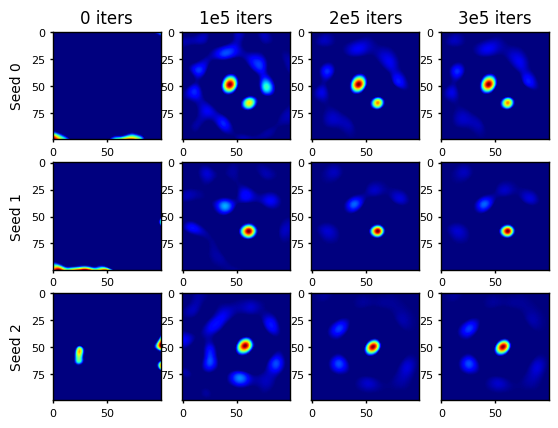

In [18]:
weber_grid_cells = np.load("weber_grids.npy")
# weber_grid_cells.shape = (n_seeds, bins_x, bins_y, train_stage)

# Let's plot some of them
plot_n_cells = 3
f, ax = plt.subplots(plot_n_cells, 4)
for i in range(plot_n_cells):
    ax[i, 0].imshow(weber_grid_cells[i, :, :, 0], cmap="jet")
    ax[i, 1].imshow(weber_grid_cells[i, :, :, 1], cmap="jet")
    ax[i, 2].imshow(weber_grid_cells[i, :, :, 2], cmap="jet")
    ax[i, 3].imshow(weber_grid_cells[i, :, :, 3], cmap="jet")
    ax[i, 0].set_ylabel("Seed "+str(i))

ax[0, 0].set_title("0 iters")
ax[0, 1].set_title("1e5 iters")
ax[0, 2].set_title("2e5 iters")
ax[0, 3].set_title("3e5 iters")

In [19]:
weber_grid_cells.shape

(30, 100, 100, 4)

# Neural Representation Comparison
Now that we have neural representations from models, and recorded grid cells for similar environments, can we compare the representations? In this case, we will compare the firing rate at each point in space from the model and from the data. To do this, we adopt the Procrustes Alignment which we explain now.

## What is Procrustes Alignment
Procrustes alignment is a method from shape analysis. Given two sets of points in a high-dimensional space, e.g., neural recordings to different stimuli (points in space in our case) vs. model units activity, it finds the **best affine transformation** (rotation, reflection, scaling, translation) that minimizes the distance between corresponding points.

Formally, given matrices $X$ (neural recordings, here real grid cells) and $Y$ (model responses, here simulated grid cells), Procrustes finds $(R, s, t)$ such that:

$$\min_{R, s, t} \; \| X - (s YR + t) \|$$

where:
- $R$ is a rotation/reflection,
- $s$ is a scaling factor,
- $t$ is a translation.

### Why is the Procrustes Alignment a Good Metric for Comparing Neural Representations?

Geometrical figures are invariant to translation, scaling, and rotation. This means that, for instance, if you apply any of these transformations to a shape, the shape itself remains the same. Think, for example, of a triangle or any other geometrical shape: moving it, rotating it, or resizing it (scaling) preserves the features that define its shape.  

Therefore, given the geometry of neural recordings (represented by the points in $X$), if you can find a transformation, rotation, scaling, and translation, which can be represented as an affine transformation, to map the model representation $Y$ to $X$, then you can say that both representations share the same **geometrical shape**. See [Goodall 2018](https://academic.oup.com/jrsssb/article/53/2/285/7028139) for technical details of this method, and see a neuroscience application in [Williams et al. 2024](https://pmc.ncbi.nlm.nih.gov/articles/PMC10760997/) and [Ostrow et al. 2023](https://arxiv.org/pdf/2306.10168).

- what does it really mean to have found a transformation?
- How can we determine whether one transformation is better than another?
- Does the smallest distance necessarily imply a closer match, meaning that the distributions are more similar?

### Constructing $X$ (Neural Data) and $Y$ (Model Neurons)

First, you'll need to construct your neural data matrix, $X$, and your model neuron matrix, $Y$.

To create $X$, use the `sargoloni_data.tetrode_ratemap` method. This method is similar to `plot_recording_tetr` but doesn't plot the maps. Use it to obtain a few ratemaps for `N_ratemaps` grid cells from the dataset. Flatten these ratemaps and stack them along the second dimension to get the matrix `X_mec` with a shape of `(x_bins * y_bins, N_ratemaps)`.

Next, do the same for the model neurons (e.g., for the Successor Representation (SR) model) to create the matrix `Y_sr`. This matrix should have a shape of `(N_states, N_ratemaps)`.

Ideally, `X_mec.shape` should be equal to `Y_sr.shape`. However, the default ratemaps often have more spatial locations than the SR model. To make their shapes compatible, you'll need to adjust one of the parameters. A good way to do this is to either modify the `bin_size` argument in `sargoloni_data.tetrode_ratemap` or change the `state_density` of the SR model, or simply a 2D interpolation to get them to the same shape.

In [20]:
""" Solution, maybe you want to comment it out or remove this before
Also, remember that people can fetch the entire dataset, 
not just the small subset in case they want more cells
"""

tetrode_ids = ["T5C2", "T6C1", "T6C2", "T6C3", "T8C2"]

# Arrays to store the output
rate_maps = []
x_bins = []
y_bins = []

# Loop over each tetrode ID and extract the data
# This bin size is the trick to make it have the same dimension, but not needed, you can just interpolate
# to have X and Y being the same size
for tet_id in tetrode_ids:
    rate_map, x_bin, y_bin = sargolini_data.tetrode_ratemap(
        recording_index=4,
        tetrode_id=tet_id,
        bin_size=5,  
    )
    print("neural recordings ratemap shape:", rate_map.shape)
    rate_maps.append(rate_map)
    x_bins.append(x_bin)
    y_bins.append(y_bin)

# Stack the flattened rate maps column-wise to form X_mec
#X_mec = np.stack(rate_maps, axis=2)  # Shape: (N_locations, N_mec_cells)
#print("X_mec shape:", X_mec.shape)  # Should be (N_locations, 5)
# Flatten each 2D rate map to a 1D array before stacking
rate_maps_flattened = [rate_map.flatten() for rate_map in rate_maps]

# Stack the flattened maps column-wise
X_mec = np.stack(rate_maps_flattened, axis=1)  # Shape: (2500, 5)

print("X_mec shape:", X_mec.shape)

neural recordings ratemap shape: (20, 20)
neural recordings ratemap shape: (20, 20)
neural recordings ratemap shape: (20, 20)
neural recordings ratemap shape: (20, 20)
neural recordings ratemap shape: (20, 20)
X_mec shape: (400, 5)


In [21]:
""" Because for Weber this takes forever,
I'll add a pre-trained set of grid maps to 
have some variety without having to train the entire thing
"""

eigen_ids = [5,10,15,20,25]  # 5 eigenvectors

# Arrays to store the output
rate_maps = []
x_bins = []
y_bins = []

# Loop over each tetrode ID and extract the data
for eigen_id in eigen_ids:
    rate_map = SR_agent.get_rate_map_matrix(sr_matrix=SR_agent.srmat_ground,eigen_vector=eigen_id)
    rate_maps.append(rate_map)
    print("SR ratemap shape:", rate_map.shape)
    x_bins.append(x_bin)
    y_bins.append(y_bin)

rate_maps_flattened = [rate_map.flatten() for rate_map in rate_maps]

# Stack the flattened rate maps column-wise to form X_sr
X_sr = np.stack(rate_maps_flattened, axis=1)  # Shape: (N_states, N_eigenvectors)

print("X_sr shape:", X_sr.shape)  # Should be (N_states, N_eigenvectors)

SR ratemap shape: (20, 20)
SR ratemap shape: (20, 20)
SR ratemap shape: (20, 20)
SR ratemap shape: (20, 20)
SR ratemap shape: (20, 20)
X_sr shape: (400, 5)


## The comparison goes as follows

### Step 1: Preprocess the data
- Standardize both datasets (`X_mec` and `X_sr`) by centering (zero mean) and scaling (unit variance).

### Step 2: Procrustes Alignment
- Apply `orthogonal_procrustes` method from scipy (which implements the solution by [Peter H. Schönemann 1996](https://link.springer.com/article/10.1007/BF02289451)) to find the best rotation matrix `R` that aligns `X_sr` to `X_mec`.
- Because we have standardize the grid cell ratemaps, we only need to compute $$\min_{R} \; \| X - YR \|$$ subject to $R$ being a rotation matrix, $RR^T=I$.
- Multiply `X_sr_pre` by `R` to obtain the aligned version (`X_sr_aligned`).

### Step 3: Quantitative Metrics
- Define a function to compute **average cosine similarity** between corresponding rows of two datasets.
- Compute:
  - Frobenius norm distance between `X_mec_pre` and both `X_sr_pre` (unaligned) and `X_sr_aligned`.
  - Average cosine similarity before and after alignment.
- Print these metrics for comparison.

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import orthogonal_procrustes
from sklearn.preprocessing import StandardScaler

# --- Load your data here ---
# X_mec and X_sr must be (N_locations, N_features)
# X_mec: real MEC data; X_sr: model representations (e.g., SR eigenvectors)

# --- Step 1: Preprocess (center & scale) ---
scaler_mec = StandardScaler()
X_mec_pre = scaler_mec.fit_transform(X_mec)

scaler_sr = StandardScaler()
X_sr_pre = scaler_sr.fit_transform(X_sr)

# --- Step 2: Procrustes Alignment (FIXED: removed extra scaling) ---
R, _ = orthogonal_procrustes(X_sr_pre, X_mec_pre)
X_sr_aligned = X_sr_pre @ R

# --- Step 3: Quantitative Metrics ---
def avg_cosine_sim(X1, X2):
    sims = [np.dot(X1[i], X2[i]) /
            (np.linalg.norm(X1[i]) * np.linalg.norm(X2[i]))
            for i in range(len(X1))]
    return np.nanmean(sims)

d_aligned = np.linalg.norm(X_mec_pre - X_sr_aligned, 'fro')
d_unaligned = np.linalg.norm(X_mec_pre - X_sr_pre, 'fro')
cos_sim_aligned = avg_cosine_sim(X_mec_pre, X_sr_aligned)
cos_sim_unaligned = avg_cosine_sim(X_mec_pre, X_sr_pre)

print(f"Procrustes Distance (Aligned):   {d_aligned:.4f}")
print(f"Procrustes Distance (Unaligned): {d_unaligned:.4f}")
print(f"Avg Cosine Similarity (Aligned):   {cos_sim_aligned:.4f}")
print(f"Avg Cosine Similarity (Unaligned): {cos_sim_unaligned:.4f}")

Procrustes Distance (Aligned):   53.9113
Procrustes Distance (Unaligned): 59.7937
Avg Cosine Similarity (Aligned):   0.2127
Avg Cosine Similarity (Unaligned): 0.1474


/Users/rodrigo/miniconda3/envs/npg/lib/python3.12/site-packages/scipy/linalg/_procrustes.py:108: RuntimeWarning: divide by zero encountered in matmul
  u, w, vt = svd((B.T @ np.conjugate(A)).T)
/Users/rodrigo/miniconda3/envs/npg/lib/python3.12/site-packages/scipy/linalg/_procrustes.py:108: RuntimeWarning: overflow encountered in matmul
  u, w, vt = svd((B.T @ np.conjugate(A)).T)
/Users/rodrigo/miniconda3/envs/npg/lib/python3.12/site-packages/scipy/linalg/_procrustes.py:108: RuntimeWarning: invalid value encountered in matmul
  u, w, vt = svd((B.T @ np.conjugate(A)).T)
/var/folders/_z/8l999qb50z30hnql39gv4whh0000gn/T/ipykernel_4790/915298476.py:19: RuntimeWarning: divide by zero encountered in matmul
  X_sr_aligned = X_sr_pre @ R
/var/folders/_z/8l999qb50z30hnql39gv4whh0000gn/T/ipykernel_4790/915298476.py:19: RuntimeWarning: overflow encountered in matmul
  X_sr_aligned = X_sr_pre @ R
/var/folders/_z/8l999qb50z30hnql39gv4whh0000gn/T/ipykernel_4790/915298476.py:19: RuntimeWarning: invali

### Step 4: Random Baseline (Shuffle Test)
- Perform a shuffle test as a null distribution:
  - Shuffle rows of `X_sr_pre` 100 times.
  - For each shuffle, compute Procrustes alignment, distance, and cosine similarity.
- Collect results across shuffles.
- Plot histograms of the null distributions and mark the actual observed values for comparison.

### Step 5: Rotated ratemap inspection
- Use the transformation `R` found from the Procrustes Alignment to transform the set of grid cells from the model to have better alignment with experimental data.

/var/folders/_z/8l999qb50z30hnql39gv4whh0000gn/T/ipykernel_4790/1368317571.py:9: RuntimeWarning: divide by zero encountered in matmul
  X_sr_shuf_aligned = X_sr_shuffled @ R_rand
/var/folders/_z/8l999qb50z30hnql39gv4whh0000gn/T/ipykernel_4790/1368317571.py:9: RuntimeWarning: overflow encountered in matmul
  X_sr_shuf_aligned = X_sr_shuffled @ R_rand
/var/folders/_z/8l999qb50z30hnql39gv4whh0000gn/T/ipykernel_4790/1368317571.py:9: RuntimeWarning: invalid value encountered in matmul
  X_sr_shuf_aligned = X_sr_shuffled @ R_rand


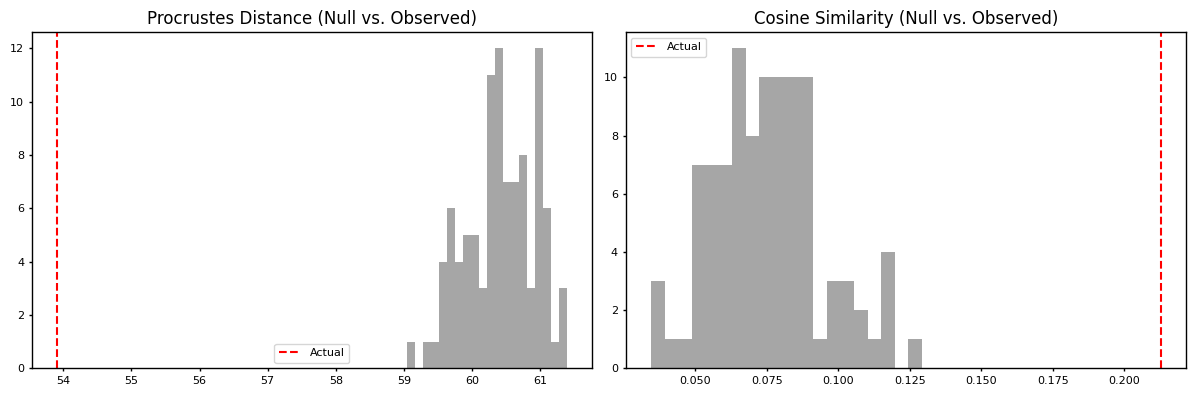

In [23]:
# --- Step 4: Random Baseline (Shuffle Test) ---
n_shuffles = 100
shuffle_distances = []
shuffle_cosines = []

for i in range(n_shuffles):
    X_sr_shuffled = np.random.permutation(X_sr_pre)
    R_rand, _ = orthogonal_procrustes(X_sr_shuffled, X_mec_pre)
    X_sr_shuf_aligned = X_sr_shuffled @ R_rand

    d_rand = np.linalg.norm(X_mec_pre - X_sr_shuf_aligned, 'fro')
    cos_rand = avg_cosine_sim(X_mec_pre, X_sr_shuf_aligned)

    shuffle_distances.append(d_rand)
    shuffle_cosines.append(cos_rand)

# Plot the null distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(shuffle_distances, bins=20, color='gray', alpha=0.7)
axes[0].axvline(d_aligned, color='red', linestyle='--', label='Actual')
axes[0].set_title('Procrustes Distance (Null vs. Observed)')
axes[0].legend()

axes[1].hist(shuffle_cosines, bins=20, color='gray', alpha=0.7)
axes[1].axvline(cos_sim_aligned, color='red', linestyle='--', label='Actual')
axes[1].set_title('Cosine Similarity (Null vs. Observed)')
axes[1].legend()

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Neural recordings SR')

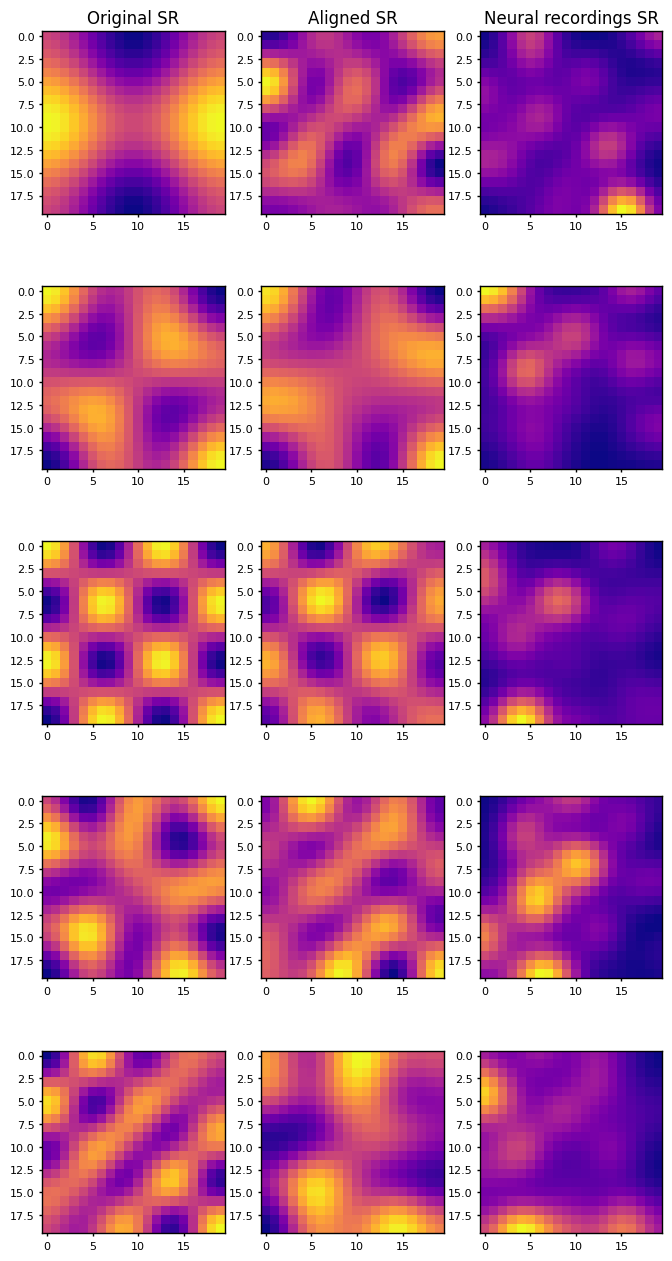

In [24]:
# --- Step 5: Rotated ratemap inspection ---
f, ax = plt.subplots(X_mec_pre.shape[-1], 3, figsize=(8, 16))
for i in range(X_mec_pre.shape[-1]):
    mec_pre = X_mec_pre[:, i].reshape((20, 20))
    sr_pre = X_sr_pre[:, i].reshape((20, 20))
    sr_aligned = X_sr_aligned[:, i].reshape((20, 20))
    ax[i, 0].imshow(sr_pre, cmap="plasma")
    ax[i, 1].imshow(sr_aligned, cmap="plasma")
    ax[i, 2].imshow(mec_pre, cmap="plasma")

ax[0, 0].set_title("Original SR")
ax[0, 1].set_title("Aligned SR")
ax[0, 2].set_title("Neural recordings SR")

### Can you compare both models (SR vs. Plasticity Network)?

- Apply the same method to the plasticity model using the grid cells in `weber_grid_cells`.  
- Keep in mind that the shapes are different. How would you compare them? Could you interpolate or use other methods?  
- What can you conclude about the alignments obtained for the SR model versus the plasticity network?  

Below, we plot some of these cells again.

(30, 100, 100, 4)


Text(0.5, 1.0, '3e5 iters')

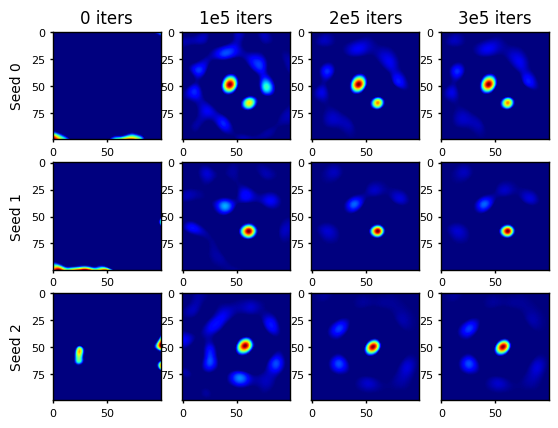

In [25]:
# weber_grid_cells.shape = (n_seeds, bins_x, bins_y, train_stage)
print(weber_grid_cells.shape)

# Let's plot some of them
plot_n_cells = 3
f, ax = plt.subplots(plot_n_cells, 4)
for i in range(plot_n_cells):
    ax[i, 0].imshow(weber_grid_cells[i, :, :, 0], cmap="jet")
    ax[i, 1].imshow(weber_grid_cells[i, :, :, 1], cmap="jet")
    ax[i, 2].imshow(weber_grid_cells[i, :, :, 2], cmap="jet")
    ax[i, 3].imshow(weber_grid_cells[i, :, :, 3], cmap="jet")
    ax[i, 0].set_ylabel("Seed "+str(i))

ax[0, 0].set_title("0 iters")
ax[0, 1].set_title("1e5 iters")
ax[0, 2].set_title("2e5 iters")
ax[0, 3].set_title("3e5 iters")

# Discussion

We do not have the answers to these questions. Instead, we invite you to discuss them with others and perhaps test some of these ideas using the code provided.

### Relevant considerations when comparing neural recordings and theoretical models
- What do you think are the most important aspects researchers should consider?
- The Procrustes alignment tests for similar geometry. What is the effect of modeling non-hexagonal grid cells? What about grid cell modularity and orientation?
- How important is the non-negativity constraint in neural recordings? Is it relevant for modeling? [Dorrell et al. 2022](https://arxiv.org/abs/2209.15563)
- Should a model also be able to account for noise?

### Data acquisition and experimental considerations
- What is the best way to handle recordings from different animals?
- What about recordings from different sessions? How should we account for changes over time, such as recording stability or learning?

### Does it make sense to do this?
- Suppose our model does a reasonably good job of generating grid cells for a given experiment. How can we be sure that it captures the true computational mechanisms underlying the neural recordings?
- Could a completely different model generate similar representations? How can we tell them apart?
- Studying neural representations in isolation is valuable. However, in this case, we are looking at a very specific subset of the entorhinal cortex. How do we integrate other (potentially) relevant brain regions or behavioral factors? Is it better to be parsimonious and study small parts in isolation, or to build more abstract models that integrate multiple regions?
- Even if we identify the “right” model, are we not simply replacing one black box (the brain) with another (the model)? To what extent do we actually understand the models we use to describe neural recordings?
